In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
customers_df=pd.read_csv('Customers.csv')
transactions_df =pd.read_csv('Transactions.csv')
merged_df=pd.merge(customers_df,transactions_df,on='CustomerID', how='inner')

In [5]:
merged_df.head()

,CustomerID,CustomerName,Region,SignupDate,TransactionID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,C0001,Lawrence Carroll,South America,2022-07-10,T00015,P054,2024-01-19 03:12:55,2,114.60,57.30
1,C0001,Lawrence Carroll,South America,2022-07-10,T00932,P022,2024-09-17 09:01:18,3,412.62,137.54
2,C0001,Lawrence Carroll,South America,2022-07-10,T00085,P096,2024-04-08 00:01:00,2,614.94,307.47
3,C0001,Lawrence Carroll,South America,2022-07-10,T00445,P083,2024-05-07 03:11:44,2,911.44,455.72
4,C0001,Lawrence Carroll,South America,2022-07-10,T00436,P029,2024-11-02 17:04:16,3,1300.92,433.64


In [21]:
X=merged_df.iloc[ : ,[7,9]].values

In [22]:
X

array([[  2.  ,  57.3 ],
       [  3.  , 137.54],
       [  2.  , 307.47],
       ...,
       [  4.  , 156.96],
       [  4.  , 416.4 ],
       [  3.  , 452.42]])

In [23]:
from sklearn.cluster import KMeans
wcss =[]

In [24]:
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

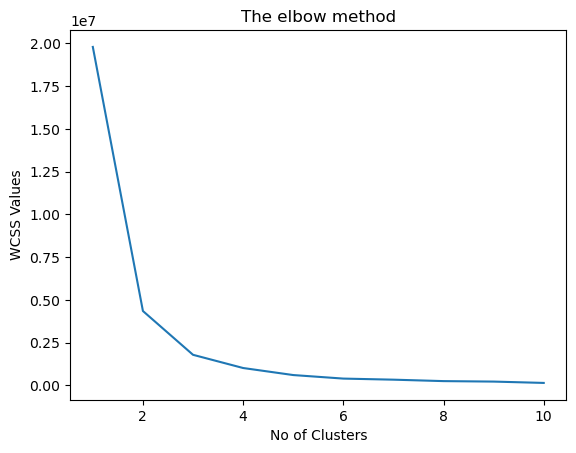

In [25]:
plt.plot(range(1,11),wcss)
plt.title('The elbow method')
plt.xlabel('No of Clusters')
plt.ylabel('WCSS Values')
plt.show()

In [29]:
kmeansmodel=KMeans(n_clusters=3, init='k-means++', random_state=0)
y_kmeans=kmeansmodel.fit_predict(X)

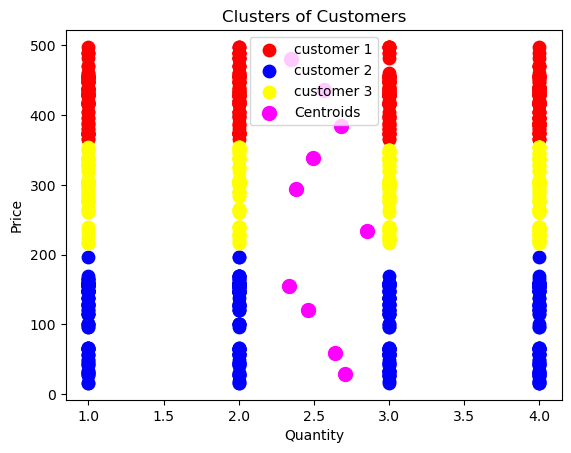

In [30]:
plt.scatter(X[y_kmeans == 0,0],X[y_kmeans ==0,1],s=80, c="red",label='customer 1')
plt.scatter(X[y_kmeans == 1,0],X[y_kmeans ==1,1],s=80, c="blue",label='customer 2')
plt.scatter(X[y_kmeans == 2,0],X[y_kmeans ==2,1],s=80, c="yellow",label='customer 3')
plt.scatter(kmeans.cluster_centers_[: ,0],kmeans.cluster_centers_[ :,1],s=100,c='magenta',label='Centroids')
plt.title('Clusters of Customers')
plt.xlabel('Quantity')
plt.ylabel('Price')
plt.legend()
plt.show()